# Exploring Dimensionality Reduction with PCA and its Impact on Model Performance


In these notebooks, we aim to analyze the effect of Principal Component Analysis (PCA) on classification performance, training efficiency, and model robustness. PCA is a widely used dimensionality reduction technique that helps remove redundancy while preserving essential information in high-dimensional datasets


## Key Objectives:

### Compare model performance with and without PCA in different datasets, including:
- Digits dataset (handwritten digit recognition)
- Synthetic dataset with high-dimensional features and redundant information
- Evaluate computational efficiency by measuring training and inference time for models trained on original vs. PCA-transformed features.
- Assess robustness by testing models on noisy data to determine how PCA affects stability in the presence of feature noise.
- Compare cross-validation performance to understand the generalization ability of models trained with PCA versus without PCA.
- Visualize PCA-explained variance to interpret how many components are required to retain meaningful information.


In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,  cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import time

Dataset Preview:
     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

Performance on Original Features:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00

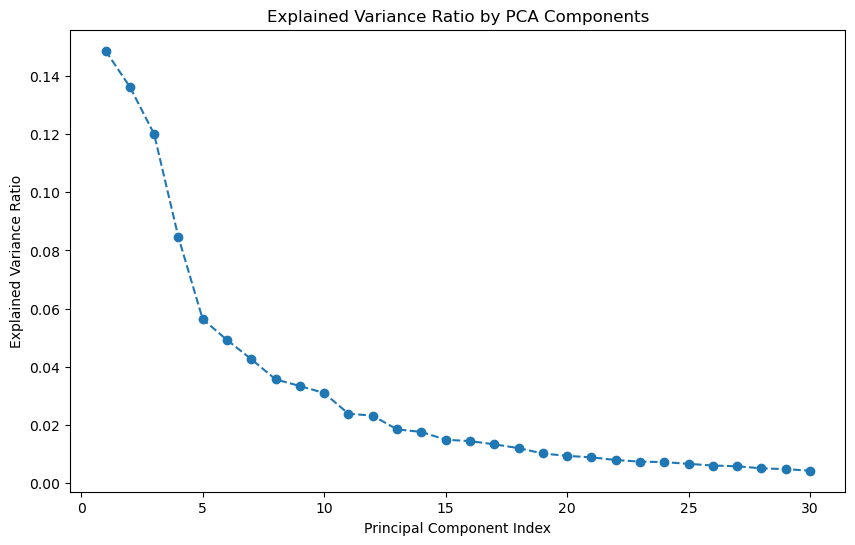

In [2]:
# Load the Digits dataset
digits = load_digits()
data = pd.DataFrame(digits.data)
data['target'] = digits.target

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate a Random Forest model on the original features
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

print("\nPerformance on Original Features:")
print(classification_report(y_test, y_pred_original))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=30)  # Reduce to 30 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate a Random Forest model on PCA-transformed features
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

print("\nPerformance on PCA-Transformed Features:")
print(classification_report(y_test, y_pred_pca))

# Compare accuracy
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nAccuracy on Original Features: {accuracy_original:.2f}")
print(f"Accuracy on PCA-Transformed Features: {accuracy_pca:.2f}")

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.show()

This figure represents the Explained Variance Ratio by each Principal Component (PC) when applying Principal Component Analysis (PCA) for dimensionality reduction.

## Key Points from the Graph:

### Explained Variance Ratio:

- The explained variance ratio indicates how much of the total variance in the data is captured by each principal component.
- Higher variance means the component retains more meaningful information from the original dataset.

### Cumulative Behavior:

- The first few components (on the left) explain a significant portion of the variance.
- As the index of the components increases, the variance contribution decreases.

### Elbow Point:

- The graph shows an elbow-shaped curve, which suggests that after a certain number of components, the explained variance becomes marginal.
- This point can guide us in selecting the optimal number of components to reduce dimensionality without losing significant information.

### Dimensionality Reduction Trade-off:

- By selecting only the first few components (e.g., the first 5-10 in this graph), we can retain most of the dataset's information while significantly reducing its dimensionality.
T
### Key Takeaway:

- PCA effectively compresses the data by capturing most of its variance in the first few components, allowing us to simplify the dataset for analysis and modeling while maintaining its essence

In [4]:
# Create a synthetic dataset with redundant features
X, y = make_classification(
    n_samples=2000, n_features=1000, n_informative=10, n_redundant=500, random_state=42
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate Random Forest without PCA
start_time = time.time()
rf_original = RandomForestClassifier(n_estimators=200, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
end_time = time.time()
time_without_pca = end_time - start_time

# Evaluate performance
accuracy_original = accuracy_score(y_test, y_pred_original)
print("\nPerformance WITHOUT PCA:")
print(f"Accuracy: {accuracy_original:.2f}")
print(f"Training and Inference Time: {time_without_pca:.2f} seconds")
print(classification_report(y_test, y_pred_original))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=20)  # Reduce to 20 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate Random Forest with PCA
start_time = time.time()
rf_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
end_time = time.time()
time_with_pca = end_time - start_time

# Evaluate performance
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("\nPerformance WITH PCA:")
print(f"Accuracy: {accuracy_pca:.2f}")
print(f"Training and Inference Time: {time_with_pca:.2f} seconds")
print(classification_report(y_test, y_pred_pca))




Performance WITHOUT PCA:
Accuracy: 0.94
Training and Inference Time: 2.98 seconds
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       304
           1       0.93      0.94      0.93       296

    accuracy                           0.94       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600


Performance WITH PCA:
Accuracy: 0.94
Training and Inference Time: 0.51 seconds
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       304
           1       0.94      0.95      0.94       296

    accuracy                           0.94       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.95      0.94      0.95       600



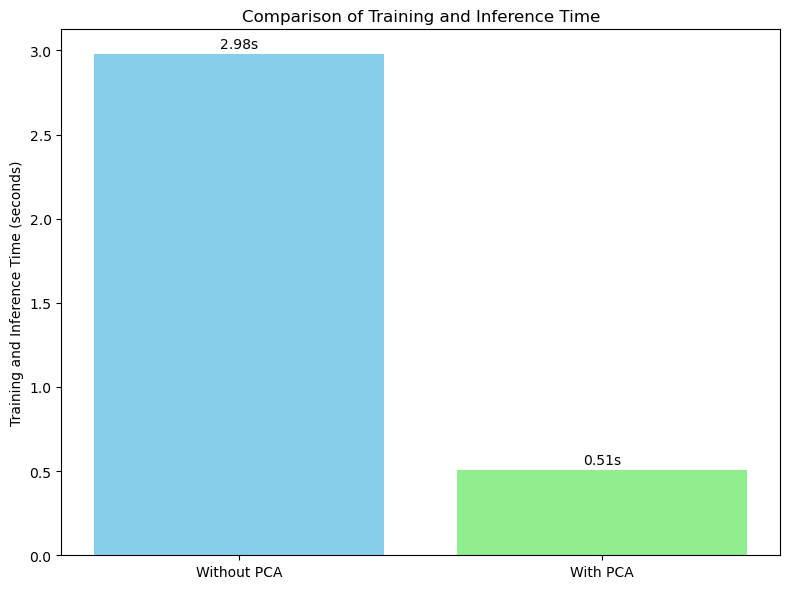

In [5]:
# Data for plotting
methods = ["Without PCA", "With PCA"]
times = [time_without_pca, time_with_pca]

# Plotting training and inference time
plt.figure(figsize=(8, 6))
plt.bar(methods, times, color=['skyblue', 'lightgreen'])
plt.ylabel("Training and Inference Time (seconds)")
plt.title("Comparison of Training and Inference Time")
plt.xticks(rotation=0)

# Annotating time values on top of the bars
for i, time in enumerate(times):
    plt.text(i, time + 0.02, f"{time:.2f}s", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
# Create a synthetic dataset with redundant features
X, y = make_classification(
    n_samples=2000, n_features=1000, n_informative=10, n_redundant=500, random_state=42
)

# Add noise to the dataset
np.random.seed(42)
X_noisy = X + np.random.normal(0, 0.1, X.shape)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_noisy, X_test_noisy = train_test_split(X_noisy, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=20)  # Reduce to 20 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca_noisy = pca.fit_transform(X_train_noisy)
X_test_pca_noisy = pca.transform(X_test_noisy)

# Train and evaluate Random Forest without PCA
start_time = time.time()
rf_original = RandomForestClassifier(n_estimators=200, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
end_time = time.time()
time_without_pca = end_time - start_time

# Train and evaluate Random Forest with PCA
start_time = time.time()
rf_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
end_time = time.time()
time_with_pca = end_time - start_time

# Robustness Test (without PCA)
start_time = time.time()
rf_noisy_original = RandomForestClassifier(n_estimators=200, random_state=42)
rf_noisy_original.fit(X_train_noisy, y_train)
y_pred_noisy_original = rf_noisy_original.predict(X_test_noisy)
end_time = time.time()
time_noisy_without_pca = end_time - start_time

# Robustness Test (with PCA)
start_time = time.time()
rf_noisy_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_noisy_pca.fit(X_train_pca_noisy, y_train)
y_pred_noisy_pca = rf_noisy_pca.predict(X_test_pca_noisy)
end_time = time.time()
time_noisy_with_pca = end_time - start_time

# Cross-validation scores
cv_original = np.mean(cross_val_score(rf_original, X, y, cv=5))
cv_pca = np.mean(cross_val_score(rf_pca, pca.fit_transform(X), y, cv=5))

# Print Results
print("\nPerformance WITHOUT PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original):.2f}")
print(f"Training Time: {time_without_pca:.2f} seconds")
print(f"Cross-Validation Score: {cv_original:.2f}")

print("\nPerformance WITH PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.2f}")
print(f"Training Time: {time_with_pca:.2f} seconds")
print(f"Cross-Validation Score: {cv_pca:.2f}")

print("\nRobustness Test WITHOUT PCA (Noisy Data):")
print(f"Accuracy on Noisy Data: {accuracy_score(y_test, y_pred_noisy_original):.2f}")
print(f"Training Time: {time_noisy_without_pca:.2f} seconds")

print("\nRobustness Test WITH PCA (Noisy Data):")
print(f"Accuracy on Noisy Data: {accuracy_score(y_test, y_pred_noisy_pca):.2f}")
print(f"Training Time: {time_noisy_with_pca:.2f} seconds")

# Feature Count Comparison
print(f"\nOriginal Feature Count: {X.shape[1]}")
print(f"Reduced Feature Count (PCA): {pca.n_components_}")



Performance WITHOUT PCA:
Accuracy: 0.94
Training Time: 3.12 seconds
Cross-Validation Score: 0.94

Performance WITH PCA:
Accuracy: 0.93
Training Time: 0.42 seconds
Cross-Validation Score: 0.93

Robustness Test WITHOUT PCA (Noisy Data):
Accuracy on Noisy Data: 0.94
Training Time: 2.91 seconds

Robustness Test WITH PCA (Noisy Data):
Accuracy on Noisy Data: 0.94
Training Time: 0.43 seconds

Original Feature Count: 1000
Reduced Feature Count (PCA): 20
